##### Image-Processing-Brain-Tumor
##### Writed By Mohammad Amin Khadem AL Hosseini
##### Date 2024-4-18

<div style="border: 2px solid #000; padding: 10px;
            border-radius: 10px; width: 300px;">
  <strong>My Github:</strong> <a href="https://github.com/amin98hosseini">Github</a><br>
  <strong>My Kaggle:</strong> <a href="https://www.kaggle.com/amin98hosseini">Kaggle</a><br>
  <strong>My Linkdine:</strong> <a href="https://www.linkedin.com/in/amin98hosseini/">Linkdine</a>
</div>

# <a id='1'> Table of Contents </a>

1. [Importing Libraries](#2)
2. [Image Rotation](#3)
3. [Image Cropping](#4)
4. [Affine Transformation](#5)
5. [Perspective Transformation](#6)
6. [Color Indexing](#7)
7. [Color Space Conversion](#8)

# <a id='2' href=#2> Importing Libraries </a>

In [2]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = 'E:/IAAA/ImageProcessing/Practice/BrainTumor1.jpg'
image = skimage.io.imread(image_path)
image.shape

(1200, 1130, 3)

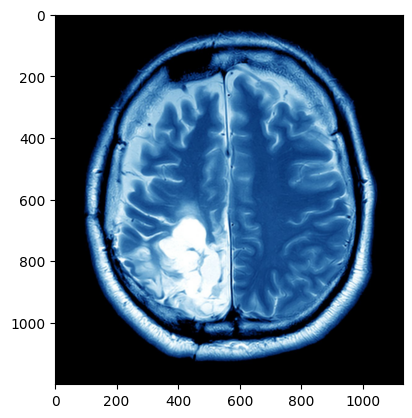

In [4]:
plt.imshow(image,cmap='gray')

# <a id='3' href=#1> Image Rotation </a>

**This function rotate_image takes an input image (image), an angle of rotation (angle), and an interpolation method (default is cv2.INTER_LINEAR).**

**It rotates the input image by the specified angle using OpenCV functions.**

In [5]:
def rotate_image(image, angle, interpolation=cv2.INTER_LINEAR):
    # Get the center of the image
    center = (image.shape[1] // 2, image.shape[0] // 2)
    
    # Define the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Determine the new dimensions of the image
    cos_theta = np.abs(rotation_matrix[0, 0])
    sin_theta = np.abs(rotation_matrix[0, 1])
    new_width = int((image.shape[1] * cos_theta) + (image.shape[0] * sin_theta))
    new_height = int((image.shape[1] * sin_theta) + (image.shape[0] * cos_theta))
    
    # Adjust the rotation matrix to take into account translation due to resizing
    rotation_matrix[0, 2] += (new_width / 2) - center[0]
    rotation_matrix[1, 2] += (new_height / 2) - center[1]
    
    # Rotate the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), flags=interpolation)
    
    return rotated_image


**This example demonstrates how to use the rotate_image function to rotate an image by a specified angle using different interpolation methods.**

In [46]:
# Example usage
input_image = cv2.imread(image_path)

# Rotate by 45 degrees using nearest neighbor interpolation
rotated_image_nearest = rotate_image(input_image, 45, interpolation=cv2.INTER_NEAREST)

# Rotate by 45 degrees using bilinear interpolation
rotated_image_bilinear = rotate_image(input_image, 45, interpolation=cv2.INTER_LINEAR)

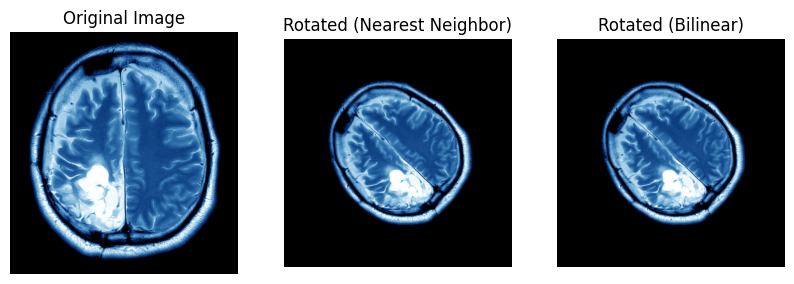

In [6]:
# Display original and rotated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rotated_image_nearest, cv2.COLOR_BGR2RGB))
plt.title('Rotated (Nearest Neighbor)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(rotated_image_bilinear, cv2.COLOR_BGR2RGB))
plt.title('Rotated (Bilinear)')
plt.axis('off')

plt.show()

# <a id='4' href=#1> Image Cropping </a>

**This Python function, crop_image, crops an input image to a specified region of interest (ROI).**

**The result of calling this function with an input image and the coordinates and dimensions of the desired ROI will be the cropped image containing only the specified region of interest.**

In [7]:
def crop_image(image, x, y, width, height):
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image

In [42]:
# Example usage
input_image = cv2.imread(image_path)

**This code snippet demonstrates the usage of the crop_image function to crop an input image to a specified region of interest (ROI)**

**This example demonstrates how to use the crop_image function to extract a specific region of interest from an input image.**

In [43]:
# Define the region of interest (x, y, width, height)
roi_x = 300
roi_y = 650
roi_width = 300
roi_height = 300

In [44]:
# Crop the image to the specified ROI
cropped_image = crop_image(input_image, roi_x, roi_y, roi_width, roi_height)

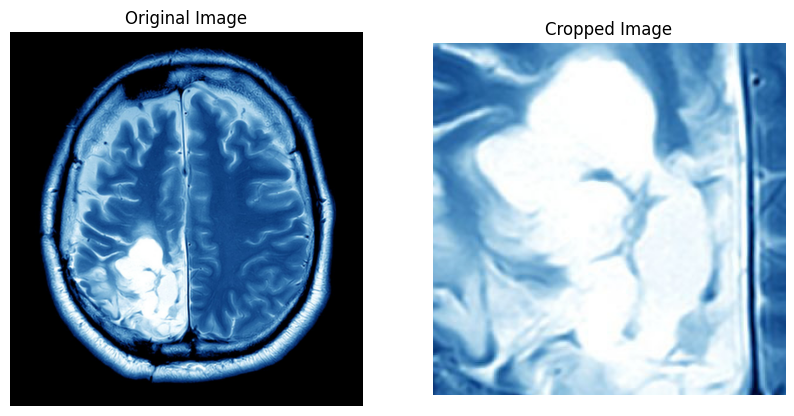

In [45]:
# Display the original and cropped images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

# <a id='5' href=#1> Affine Transformation </a>

**This Python function, translate, performs translation on an input image by a specified distance along the x and y axes.**

**The result of calling this function with an input image and specified translation distances will be the input image translated by those distances along the x and y axes.**

In [23]:
def translate(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image

**This Python function, scale, resizes an input image by scaling it along the x and y axes.**

**The result of calling this function with an input image and specified scaling factors will be the input image scaled by those factors along the x and y axes.**

In [24]:
def scale(image, scale_factor_x, scale_factor_y):
    scaled_image = cv2.resize(image, None, fx=scale_factor_x, fy=scale_factor_y)
    return scaled_image

**This Python function, shear, applies shear transformation to an input image along the x and y axes.**

**The result of calling this function with an input image and specified shear factors will be the input image sheared by those factors along the x and y axes.**

In [25]:
def shear(image, shear_factor_x, shear_factor_y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])
    sheared_image = cv2.warpAffine(image, M, (cols, rows))
    return sheared_image

**This Python function, reflect, performs reflection (also known as flipping) of an input image along either the horizontal (x-axis) or vertical (y-axis) axis.**

**The result of calling this function with an input image and a specified reflection axis will be the input image reflected along the chosen axis.**

In [26]:
def reflect(image, reflection_axis):
    if reflection_axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif reflection_axis == 'y':
        reflected_image = cv2.flip(image, 1)
    else:
        raise ValueError("Invalid reflection axis. Choose 'x' for horizontal or 'y' for vertical reflection.")
    return reflected_image

**This Python function, complex_transform, combines multiple transformations including translation, scaling, shearing, and reflection.**

**The result of calling this function with an input image will be the image transformed by applying translation, scaling, shearing, and reflection sequentially.**

In [27]:
# Combine transformations
def complex_transform(image):
    # Apply translation
    translated = translate(image, 50, 50)
    # Apply scaling
    scaled = scale(translated, 1.5, 1.5)
    # Apply shearing
    sheared = shear(scaled, 0.2, 0.2)
    # Apply reflection
    reflected = reflect(sheared, 'x')

    return reflected

In [38]:
# Load sample image
input_image = cv2.imread(image_path)

**This code snippet demonstrates the application of individual transformations as well as the complex transformation defined by the complex_transform function**

**This example demonstrates how to apply individual transformations such as translation, scaling, shearing, and reflection to an input image, as well as how to apply a sequence of transformations defined by a function (complex_transform).**

In [39]:
# Apply individual transformations
translated_image = translate(input_image, 50, 50)
scaled_image = scale(input_image, 1.5, 1.5)
sheared_image = shear(input_image, 0.2, 0.2)
reflected_image = reflect(input_image, 'x')

In [40]:
# Apply complex transformation
transformed_image = complex_transform(input_image)

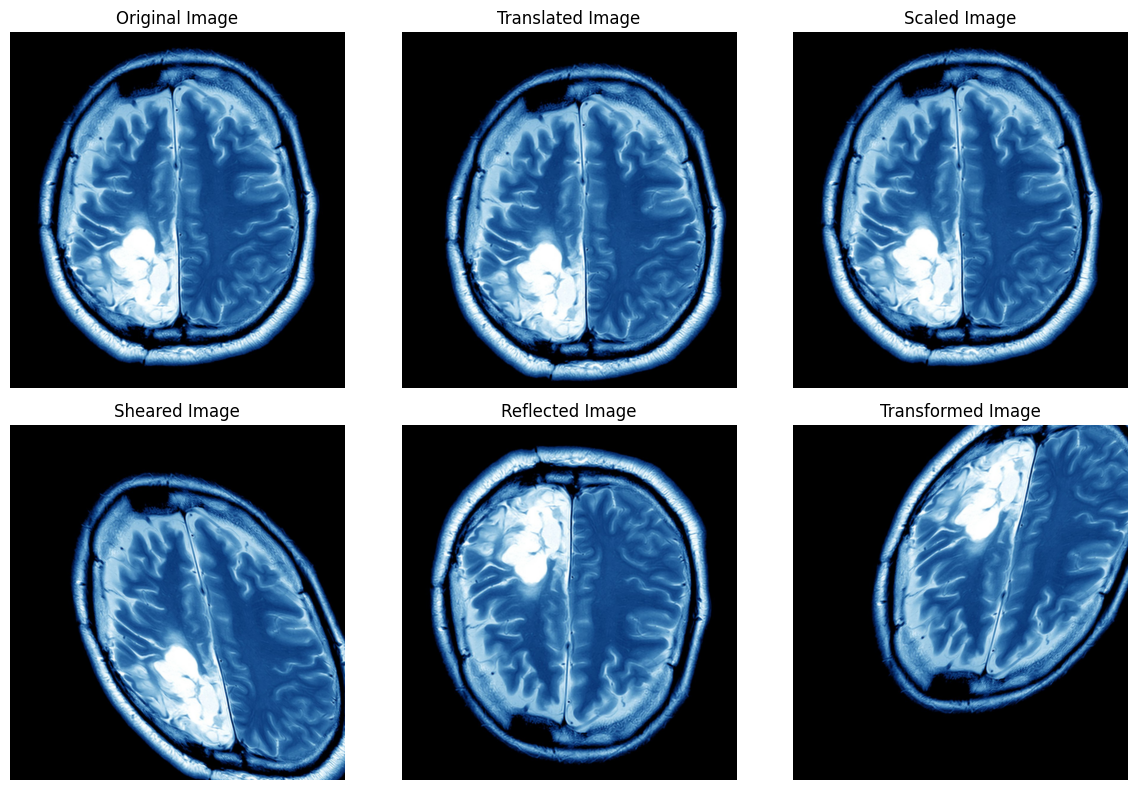

In [41]:

# Display images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(reflected_image, cv2.COLOR_BGR2RGB))
plt.title('Reflected Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# <a id='6' href=#1> Perspective Transformation </a>

**This Python function, perspective_transform, applies perspective transformation to an input image using given source and destination points.**

**The result of calling this function with an input image and corresponding source and destination points will be the input image transformed according to the perspective defined by the source and destination points.**

In [33]:
def perspective_transform(image, src_points, dst_points):
    # Calculate perspective transform matrix
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
    
    # Apply perspective transform
    transformed_image = cv2.warpPerspective(image, perspective_matrix, (image.shape[1], image.shape[0]))
    
    return transformed_image

**This code snippet reads an image from a file and performs color space conversions.**

input_image contains the original image in BGR format.

input_image_gray contains the same image in grayscale format.

input_image_rgb contains the original image converted to RGB format.

In [34]:
# Load sample image
input_image = cv2.imread(image_path)
input_image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

**This code snippet defines the source and destination points for a perspective transformation.**

src_points defines the source points, which represent the four corners of a quadrilateral in the original image. Each point is defined by its (x, y) coordinates in the image.

dst_points defines the corresponding destination points, which represent where the source points should be transformed to in the output image after the perspective transformation. Each point is defined by its (x, y) coordinates in the output image.

In [35]:
# Define source and destination points for perspective transformation
src_points = np.float32([[230, 180], [570, 180], [50, 380], [750, 380]])
dst_points = np.float32([[0, 0], [300, 0], [0, 400], [300, 400]])

In [36]:
# Apply perspective transformation
transformed_image = perspective_transform(input_image_gray, src_points, dst_points)

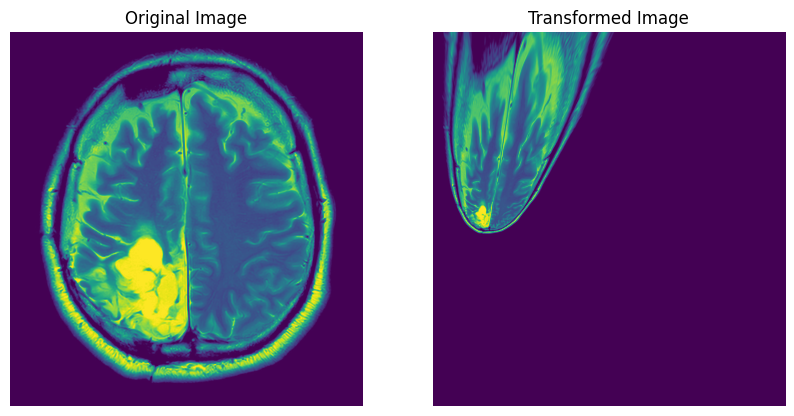

In [37]:
# Display original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image_gray)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# <a id='7' href=#1> Color Indexing </a>

**This Python function, index_colors, indexes the colors in an input image using k-means clustering.**

**The result of calling this function with an input image and the number of clusters (k) will be an indexed image where each pixel is replaced with its nearest centroid color obtained from k-means clustering.**

In [47]:
def index_colors(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape((-1, 3))
    
    # Initialize k-means clustering
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data
    kmeans.fit(pixels)
    
    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    
    # Get the labels for each pixel
    labels = kmeans.labels_
    
    # Replace each pixel with its nearest centroid color
    indexed_image = centroids[labels].reshape(image.shape)
    
    return indexed_image

In [48]:
# Load sample image
input_image = cv2.imread(image_path)

In [49]:
# Convert image from BGR to RGB (matplotlib expects RGB format)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

**This code snippet applies color indexing with k-means clustering for different values of k and visualizes the results using matplotlib.**

**The result is a visualization of the input image after color indexing with different numbers of clusters (k). Each subplot shows the indexed image for a specific value of 'k'.**

In [50]:
# Define the number of clusters (k)
k_values = [3, 5, 10]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


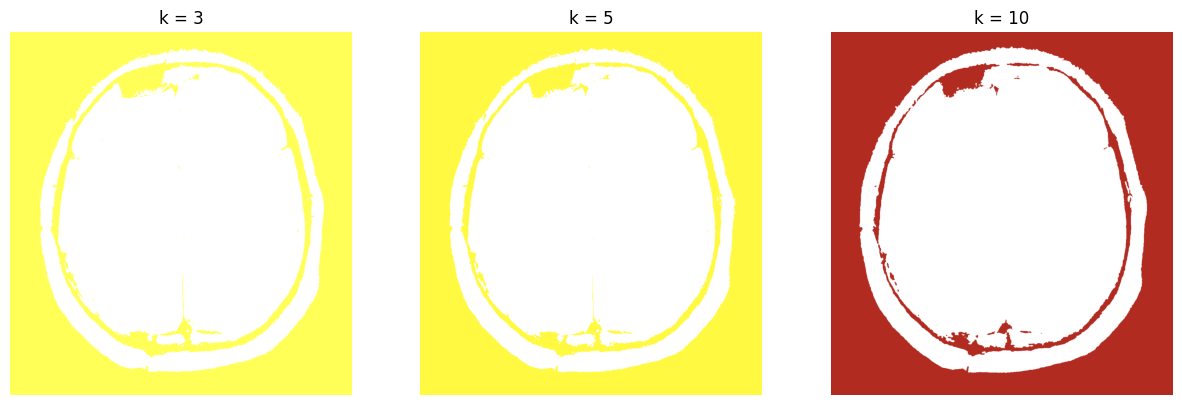

In [51]:
# Apply color indexing and visualize the results for each k
plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values):
    indexed_image = index_colors(input_image, k)
    
    plt.subplot(1, len(k_values), i+1)
    plt.imshow(indexed_image)
    plt.title(f'k = {k}')
    plt.axis('off')

plt.show()

**This Python function, index_colors_gray, indexes the colors in a grayscale input image using k-means clustering.**

**The result of calling this function with an input grayscale image and the number of clusters (k) will be an indexed image where each pixel is replaced with the grayscale value of its nearest centroid obtained from k-means clustering.**

In [56]:
def index_colors_gray(image, k):
    """
    Index colors in a grayscale image using k-means clustering.

    Args:
        image: Input grayscale image.
        k: Number of clusters.

    Returns:
        Indexed image.
    """
    # Reshape the image to a 1D array of pixels
    pixels = image.reshape((-1, 1))
    
    # Initialize k-means clustering
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data
    kmeans.fit(pixels)
    
    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    
    # Get the labels for each pixel
    labels = kmeans.labels_
    
    # Replace each pixel with its nearest centroid color
    indexed_image = centroids[labels].reshape(image.shape)
    
    return indexed_image

In [57]:
# Load sample grayscale image
input_image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

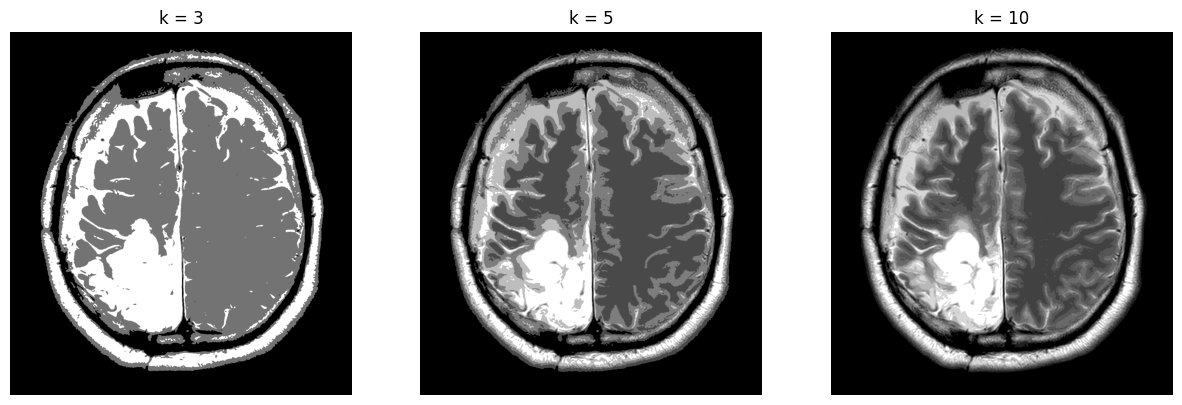

In [58]:
# Apply color indexing to the grayscale image and visualize the results for each k
plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values):
    indexed_image_gray = index_colors_gray(input_image_gray, k)
    
    plt.subplot(1, len(k_values), i+1)
    plt.imshow(indexed_image_gray, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.show()

# <a id='8' href=#1> Color Space Conversion </a>

**This Python function, convert_color_spaces, converts an input RGB image to other color spaces such as HSV, LAB, and YCbCr.**

**The result of calling this function with an input RGB image will be the image converted to the HSV, LAB, and YCbCr color spaces, respectively.**

In [60]:
def convert_color_spaces(image):
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # Convert RGB to LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Convert RGB to YCbCr
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    
    return hsv_image, lab_image, ycbcr_image

In [61]:
# Load sample image
input_image = cv2.imread(image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

In [62]:
# Convert color spaces
hsv_image, lab_image, ycbcr_image = convert_color_spaces(input_image_rgb)

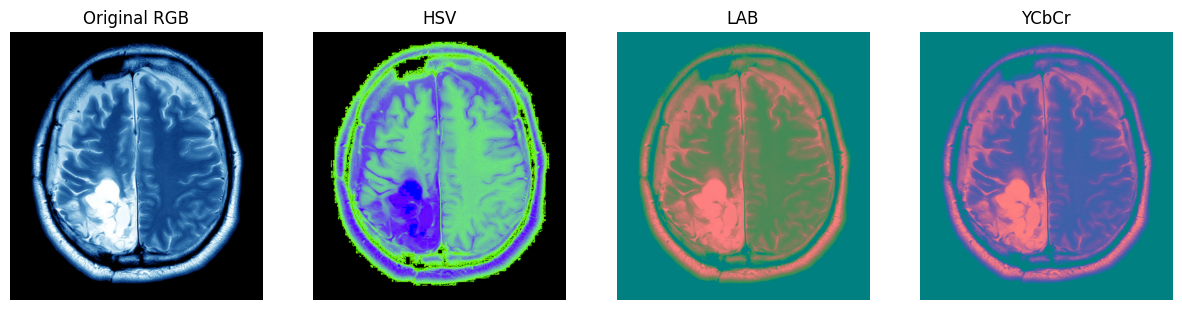

In [63]:
# Display original and converted images
plt.figure(figsize=(15, 5))

# Original RGB image
plt.subplot(1, 4, 1)
plt.imshow(input_image_rgb)
plt.title('Original RGB')
plt.axis('off')

# HSV image
plt.subplot(1, 4, 2)
plt.imshow(hsv_image)
plt.title('HSV')
plt.axis('off')

# LAB image
plt.subplot(1, 4, 3)
plt.imshow(lab_image)
plt.title('LAB')
plt.axis('off')

# YCbCr image
plt.subplot(1, 4, 4)
plt.imshow(ycbcr_image)
plt.title('YCbCr')
plt.axis('off')

plt.show()

**This Python function, convert_color_spaces, converts a grayscale image to other color spaces such as HSV, LAB, and YCbCr.**

**The result of calling this function with an input grayscale image will be a tuple containing the image converted to the HSV, LAB, and YCbCr color spaces, respectively.**

In [65]:
def convert_color_spaces(image):
    """
    Convert a grayscale image to HSV, LAB, and YCbCr color spaces.

    Args:
        image: Input grayscale image.

    Returns:
        Tuple containing images in HSV, LAB, and YCbCr color spaces.
    """
    # Convert grayscale to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    
    # Convert RGB to LAB
    lab_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)
    
    # Convert RGB to YCbCr
    ycbcr_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)
    
    return hsv_image, lab_image, ycbcr_image

In [66]:
# Load sample grayscale image
input_image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert color spaces
hsv_image, lab_image, ycbcr_image = convert_color_spaces(input_image_gray)

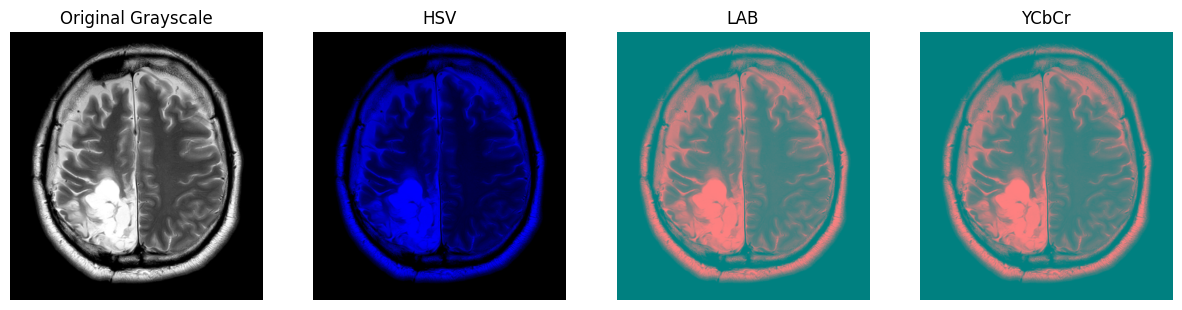

In [67]:
# Display original and converted images
plt.figure(figsize=(15, 5))

# Original grayscale image
plt.subplot(1, 4, 1)
plt.imshow(input_image_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

# HSV image
plt.subplot(1, 4, 2)
plt.imshow(hsv_image)
plt.title('HSV')
plt.axis('off')

# LAB image
plt.subplot(1, 4, 3)
plt.imshow(lab_image)
plt.title('LAB')
plt.axis('off')

# YCbCr image
plt.subplot(1, 4, 4)
plt.imshow(ycbcr_image)
plt.title('YCbCr')
plt.axis('off')

plt.show()